In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
from pathlib import Path

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## GloFAS5

In [4]:
# load reservoirs
path = Path('Z:/nahaUsers/casadje/GloFASv5/reservoirs/tables')
reservoirs = gpd.read_file(path / 'ReservoirGloFAS+GDW+parameters.shp').set_index('GDW_ID')

# compute k
k = 1 - 1 / 0.2 * reservoirs.CAP_MCM * (1 - reservoirs.flood_stor) / reservoirs.CATCH_SKM
k[k < 0] = 0

n = (k == 0).sum()
print('{0} reservoirs with "k" equal to 0 ({1:.1f}%)'.format(n, n / len(k) * 100))

241 reservoirs with "k" equal to 0 (14.1%)


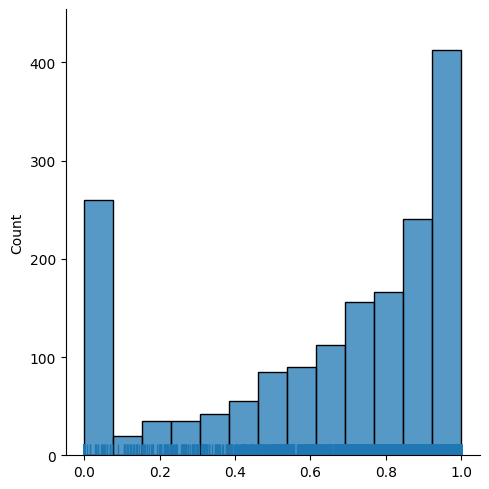

In [5]:
sns.displot(k, rug=True);

In [6]:
k[k > 0].describe()

count    1469.000000
mean        0.741508
std         0.237525
min         0.005459
25%         0.604264
50%         0.814120
75%         0.934183
max         0.999994
dtype: float64

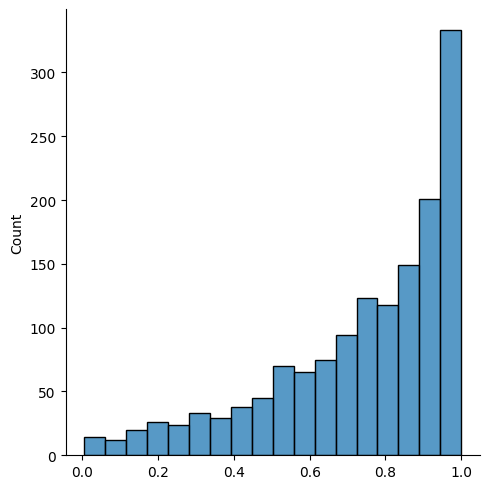

In [4]:
sns.displot(k[k > 0])

## EFAS6

In [7]:
# load reservoirs
path = Path('Z:/nahaUsers/casadje/EFASv6/reservoirs/tables')
reservoirs = pd.read_excel(path / 'efas6_reservoirs_20250303+parameters.xlsx', index_col='GDW_ID')

# compute k
k = 1 - 1 / 0.2 * reservoirs.CAP_MCM * (1 - reservoirs.flood_storage) / reservoirs.CATCH_SKM
k[k < 0] = 0

n = (k == 0).sum()
print('{0} reservoirs with "k" equal to 0 ({1:.1f}%)'.format(n, n / len(k) * 100))

274 reservoirs with "k" equal to 0 (20.2%)


In [8]:
k[k > 0].describe()

count    1085.000000
mean        0.711171
std         0.242661
min         0.002625
25%         0.593344
50%         0.772790
75%         0.902035
max         0.999368
dtype: float64